# Pymaceuticals Inc.
---

### Analysis

The summary statistics for tumor volume for each regimen show significant differences in treatment efficacy. Capomulin and Ramicane have lower mean and median values and smaller variances, standard deviations, and standard errors of the mean (SEM), indicates more consistent and potentially stronger effects compared to other regimens such as Ketapril and Placebo. This suggests that Capomulin and Ramicane are more effective in reducing tumor size and variability in tumor response. 

The bar chart indicates that Capomulin and Ramicane have the highest number of observed time points among drug regimens, suggesting their prolonged evaluation for effectiveness. While Propriva shows the fewest time points, showing  potential issues with its efficacy.

The pie chart for gender distribution among mice is nearly equal, with 51% male and 49% female showing that there is balanced research outcomes across genders.

Analysis of quartiles and outliers through the box plot reveals infubinol as an outlier among treatments, with a notably higher median tumor volume, indicating potentially less effective tumor reduction compared to others like capomulin and ramicane. Infubinol stands out as an outlier among the treatments. Its median tumor volume is higher than that of Capomulin and Ramicane, suggesting potentially less effective tumor reduction. Capomulin and Ramicane exhibit lower median tumor volumes, indicating better efficacy in reducing tumor size compared to Infubinol.

The line plot for Capomulin treatment depicts an initial increase in tumor volume followed by a decrease, suggesting effectiveness over time despite the changes towards the end of the treatment period.

The scatter plot shows a positive correlation between mouse weight and tumor size for mice on Capomulin, with heavier mice tending to have larger tumors, influencing treatment outcomes.

Regression analysis confirms a positive correlation between mouse weight and tumor volume, suggesting weight as a factor in tumor progression and treatment response.

In conclusion, Capomulin is the leading treatment regimen for reducing tumor size in mice.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = 'inner')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(merged_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_total = len(clean_df['Mouse ID'].unique())
clean_mice_total

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe()

summary_statistics = summary_statistics[['mean', '50%', 'std']].rename(
    columns={
        'mean': 'Mean Tumor Volume',
        '50%': 'Median Tumor Volume',
        'std': 'Tumor Volume Std. Dev.'
    }
)

# Calculating variance and SEM'
summary_statistics['Tumor Volume Variance'] = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_statistics['Tumor Volume Std. Err.'] = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_statistics = summary_statistics[
    ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
]

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], ['mean', 'median', 'var', 'std', 'sem']])

summary_statistics.columns = columns
summary_statistics


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

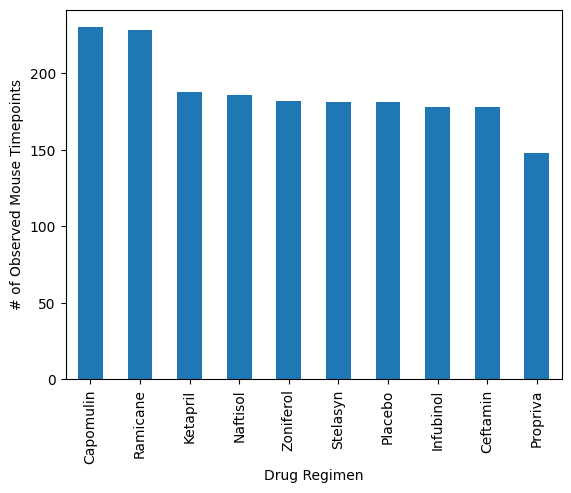

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = clean_df['Drug Regimen'].value_counts()

drug_regimen.plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

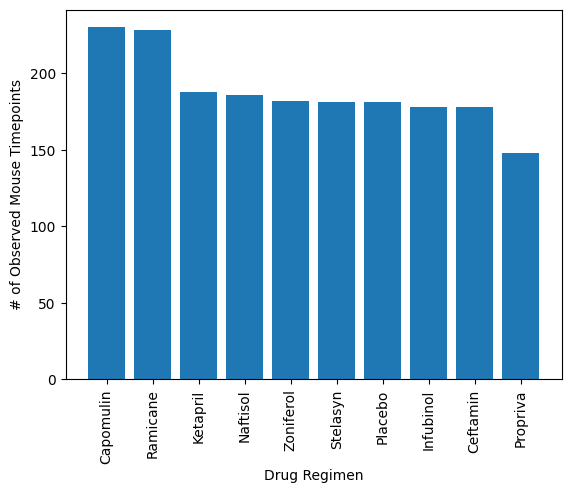

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_total = clean_df['Drug Regimen'].value_counts()

plt.bar(drug_regimen_total.index, drug_regimen_total)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation = 90)

plt.show

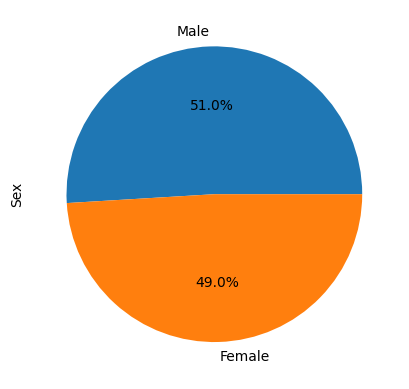

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_versus_male = clean_df['Sex'].value_counts()

female_versus_male.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('Sex')
plt.show()

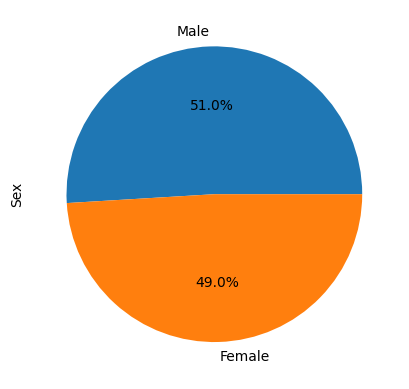

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_versus_male = clean_df['Sex'].value_counts()

plt.pie(female_versus_male, labels=female_versus_male.index, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoints_df = pd.merge(clean_df, last_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')
merged_timepoints_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = clean_df.loc[clean_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    final_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f'{treatment}\'s potential outliers: {final_outliers}')


Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


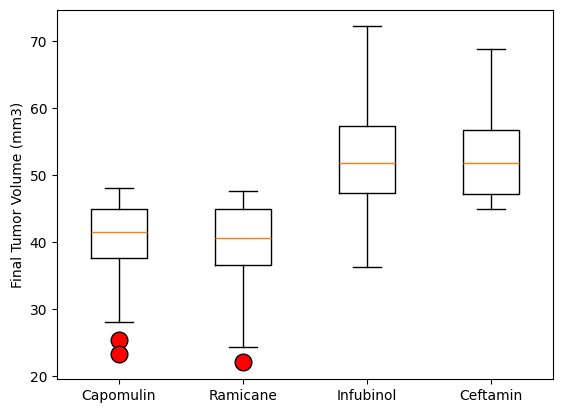

In [65]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, tick_labels=treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize=12))

plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

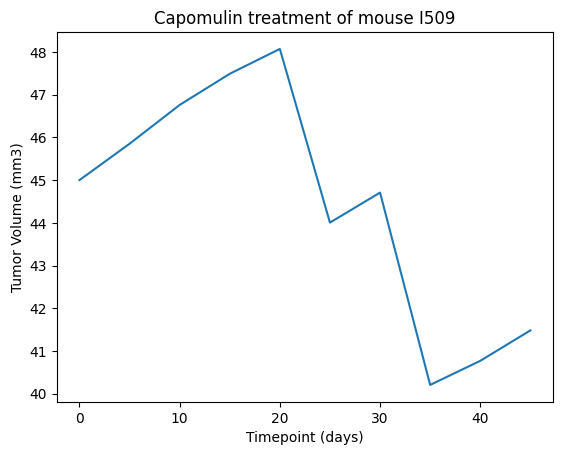

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'l509')]

plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)") 
plt.ylabel("Tumor Volume (mm3)")

plt.show()

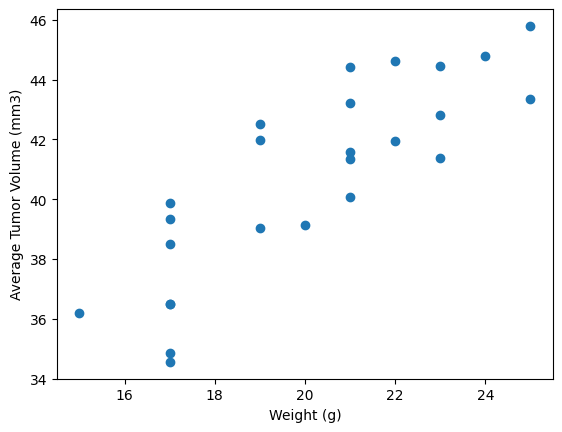

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_regimen.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

plt.scatter(average_tumor_volume['Weight (g)'],average_tumor_volume['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

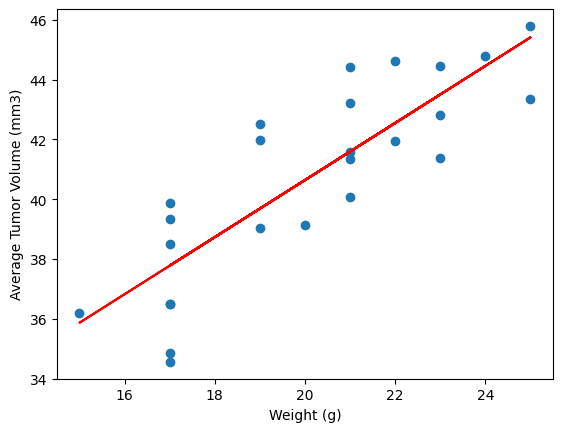

In [80]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()

slope, intercept, rvalue, pvalue,  stderr = st.linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
fit = slope * average_tumor_volume['Weight (g)'] + intercept

plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])
plt.plot(average_tumor_volume['Weight (g)'], fit, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()